# Exploratory Data Analysis on Dataset - Terrorism 

    As a security/defense analyst, try to find out the hot zone of terrorism.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

# For Read Data


In [2]:
df_t=pd.read_csv("globalterrorismdb_0718dist.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_t.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df_t.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

# Rename the columns

In [5]:
df_t.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day', 'country_txt':'Country','provstate':'pstate',
                         'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
df_t = df_t[['Year','Month','Day','Country','pstate','Region','city','latitude','longitude','AttackType','Killed',
                      'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df_t.head()

,Year,Month,Day,Country,pstate,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [7]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   pstate       181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [8]:
df_t.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [9]:
df_t.shape

(181691, 18)

# In Data Analysis What All Things We Do
 1. Missing values
 2. Explore About the Numerical variables
 3. Explore About Categorical variables
 4. Finding Relationship between features

In [10]:
df_t.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
pstate            421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [11]:
[features for features in df_t.columns if df_t[features].isnull().sum()>0]

['pstate',
 'city',
 'latitude',
 'longitude',
 'Killed',
 'Wounded',
 'Target',
 'Summary',
 'Motive']

<AxesSubplot:>

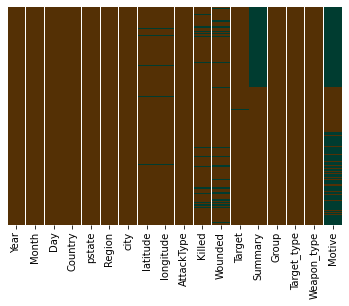

In [12]:
sns.heatmap(df_t.isnull(),yticklabels=False,cbar=False,cmap='BrBG')

In [13]:
print('Country with most attacks: ',df_t['Country'].value_counts().idxmax())
print('City with most attacks: ',df_t['city'].value_counts().index[1])
print("Region with the most attacks:",df_t['Region'].value_counts().idxmax())
print("Year with the most attacks:",df_t['Year'].value_counts().idxmax())
print("Month with the most attacks:",df_t['Month'].value_counts().idxmax())
print("Group with the most attacks:",df_t['Group'].value_counts().index[1])
print("Most Attack Types:",df_t['AttackType'].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [14]:
df_t['Year'].value_counts(dropna=False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

# Data Visualization

In [15]:
df_t["Year"].min()   # to see minimum year

1970

In [16]:
df_t["Year"].max() # To see maximum year

2017

In [17]:
a = df_t.pivot_table('AttackType',index = "Year", columns='Country',aggfunc = "sum")
a.head()



Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1970,NaN,NaN,NaN,NaN,NaN,NaN,Hostage Taking (Kidnapping)Hostage Taking (Kid...,NaN,Bombing/Explosion,NaN,...,NaN,NaN,NaN,Armed AssaultFacility/Infrastructure AttackBom...,NaN,NaN,NaN,NaN,NaN,NaN
1971,NaN,NaN,NaN,NaN,NaN,NaN,Armed AssaultBombing/ExplosionBombing/Explosio...,NaN,Bombing/Explosion,NaN,...,NaN,NaN,NaN,Bombing/ExplosionBombing/ExplosionFacility/Inf...,NaN,NaN,NaN,NaN,Hostage Taking (Kidnapping),NaN
1972,NaN,NaN,Hostage Taking (Barricade Incident),NaN,NaN,NaN,Armed AssaultHostage Taking (Kidnapping)Assass...,NaN,Bombing/ExplosionAssassinationAssassinationAss...,Bombing/ExplosionHijackingAssassinationAssassi...,...,NaN,NaN,Armed Assault,Bombing/ExplosionBombing/ExplosionBombing/Expl...,NaN,NaN,NaN,AssassinationAssassinationAssassination,NaN,NaN
1973,Unknown,NaN,NaN,NaN,NaN,NaN,Bombing/ExplosionAssassinationAssassinationArm...,NaN,NaN,Armed AssaultHostage Taking (Kidnapping),...,NaN,NaN,NaN,Facility/Infrastructure AttackArmed AssaultFac...,NaN,NaN,Bombing/Explosion,Assassination,Assassination,NaN
1974,NaN,NaN,NaN,Armed Assault,NaN,NaN,Hostage Taking (Kidnapping)Hostage Taking (Kid...,NaN,Facility/Infrastructure Attack,Unarmed Assault,...,NaN,NaN,NaN,Bombing/ExplosionBombing/ExplosionBombing/Expl...,NaN,NaN,Bombing/Explosion,NaN,NaN,NaN


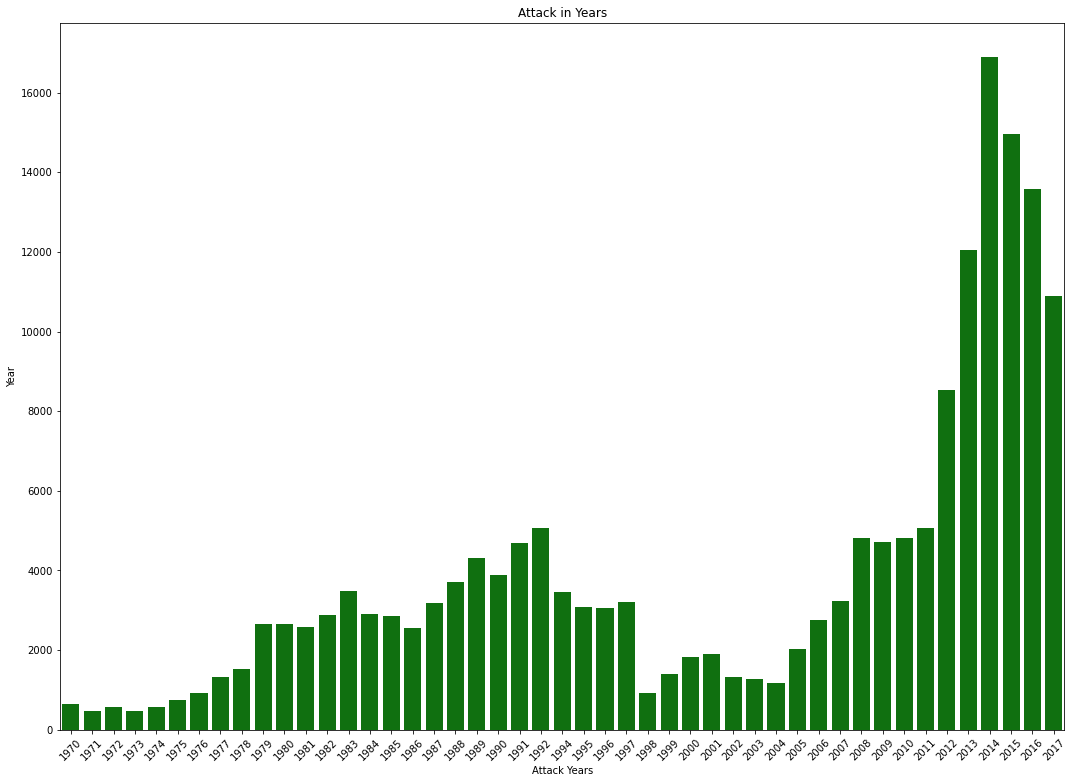

In [18]:


x_year = df_t['Year'].unique()
y_year = df_t['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(18,13))
plt.title("Attack in Years")
plt.xlabel("Attack Years")
plt.ylabel("Number of attacks each year")
plt.xticks(rotation=45)
sns.barplot(x=x_year, y=y_year,color='green')
plt.show()

Observation:- Maximum Attacks in 2012 to 2017

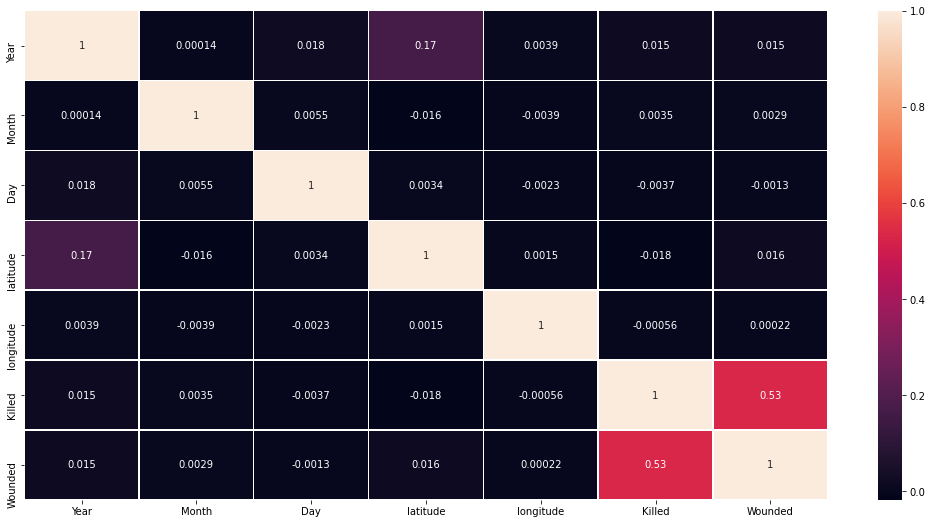

In [19]:
plt.figure(figsize=[18,9])
sns.heatmap(df_t.corr(), linewidths=0.4,annot=True)
plt.show()


In [20]:
co_attacks = df_t.Country.value_counts()[:25]
co_attacks

Iraq                        24636
Pakistan                    14368
Afghanistan                 12731
India                       11960
Colombia                     8306
Philippines                  6908
Peru                         6096
El Salvador                  5320
United Kingdom               5235
Turkey                       4292
Somalia                      4142
Nigeria                      3907
Thailand                     3849
Yemen                        3347
Spain                        3249
Sri Lanka                    3022
United States                2836
Algeria                      2743
France                       2693
Egypt                        2479
Lebanon                      2478
Chile                        2365
Libya                        2249
West Bank and Gaza Strip     2227
Syria                        2201
Name: Country, dtype: int64

OBSERVATION:- Most Attack happens in Iraq

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


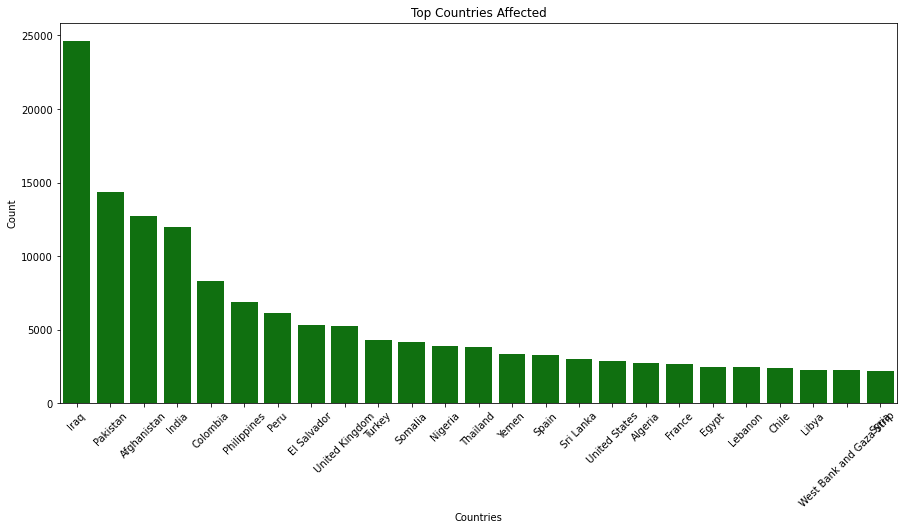

In [21]:
plt.subplots(figsize=(15,7))
sns.barplot(co_attacks.index,co_attacks.values,color='green')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

OBSERVAtION:- Top 4 countries mostly affected by Attacks are[iraq,pakistan,Afghanistan,India]

In [22]:
grp_attacks = df_t.Group.value_counts()[:25]
grp_attacks

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                      1351
Palestinians  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


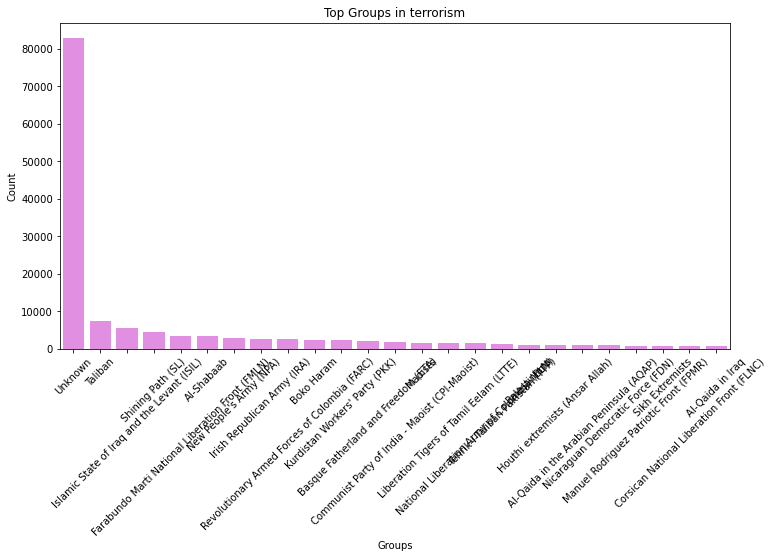

In [23]:
plt.subplots(figsize=(12,6))
sns.barplot(grp_attacks.index,grp_attacks.values,color='violet')
plt.title('Top Groups in terrorism')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()


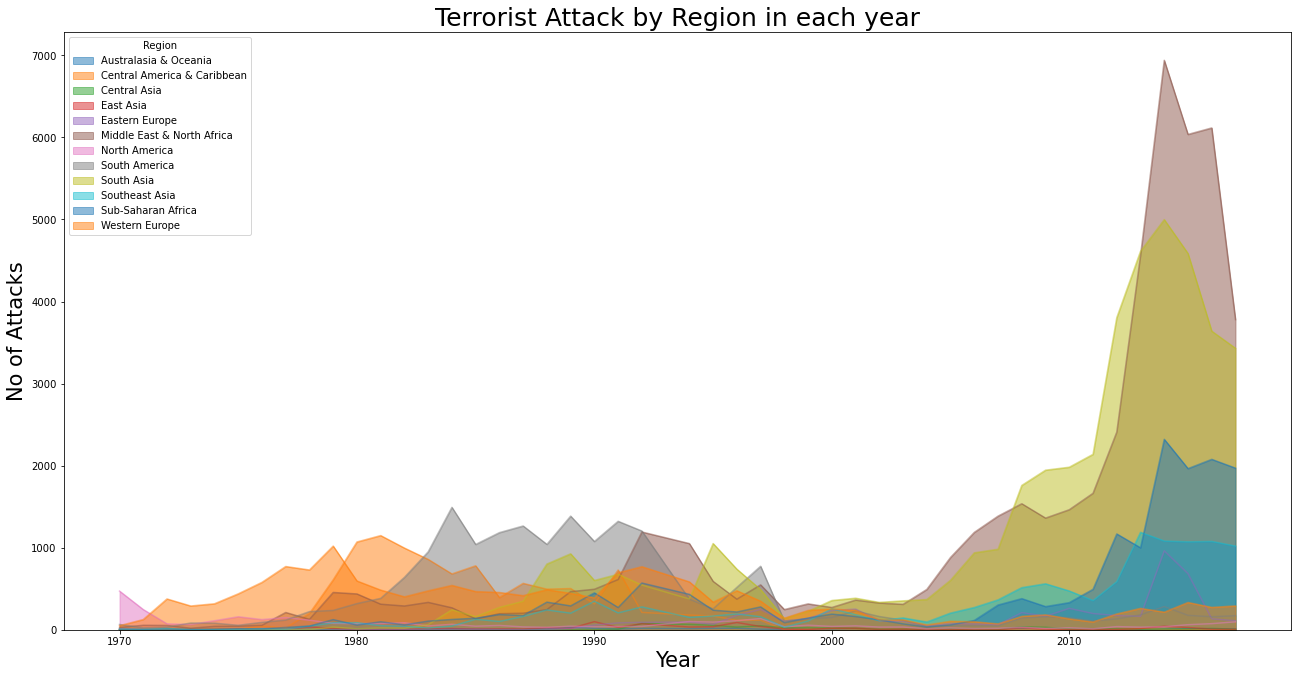

In [24]:
pd.crosstab(df_t.Year,df_t.Region).plot(kind='area',stacked=False,figsize=(22,11))
plt.title("Terrorist Attack by Region in each year",fontsize=25)
plt.ylabel("No of Attacks",fontsize=21)
plt.xlabel("Year",fontsize=21)
plt.show()

In [25]:
# No of Attack in different Cities

In [27]:
city_attack = df_t.city.value_counts()[1:25]
city_attack

Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
Belfast           2171
Santiago          1621
Mogadishu         1581
San Salvador      1558
Istanbul          1048
Athens            1019
Bogota             984
Kirkuk             925
Beirut             918
Medellin           848
Benghazi           840
Peshawar           819
Quetta             803
Guatemala City     755
Baqubah            745
Kabul              738
Srinagar           658
Jerusalem          636
Paris              612
Fallujah           582
Name: city, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


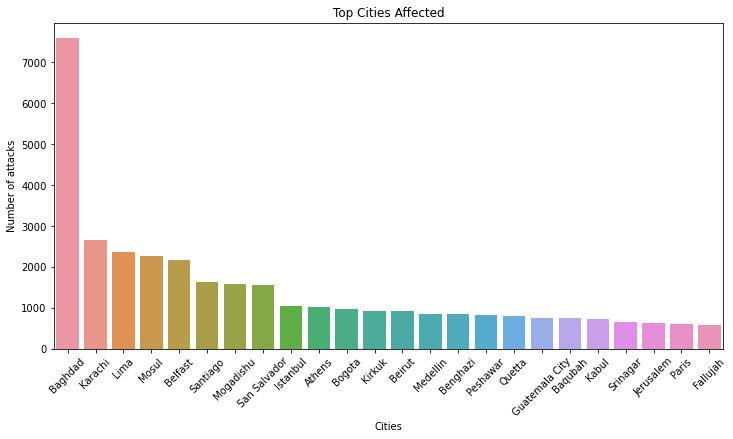

In [29]:
plt.subplots(figsize=(12,6))
sns.barplot(city_attack.index,city_attack.values)
plt.title('Top Cities Affected')
plt.xlabel('Cities')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 45)
plt.show()


In [ ]:
# OBsERVATION:- IN city Mostly Attacks in Baghdad

<AxesSubplot:>

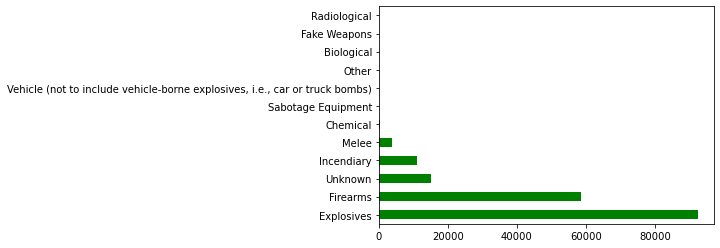

In [34]:
df_t["Weapon_type"].value_counts().plot(kind="barh",color="green")

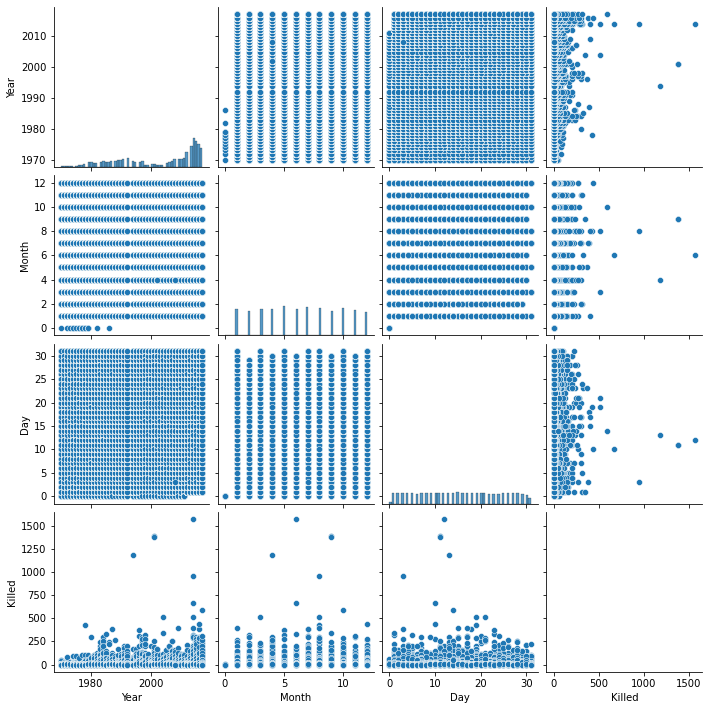

In [38]:
sns.pairplot(df_t,vars=["Year","Month","Day","Killed"])

In [43]:
killed_ = df_t[['AttackType','Killed']].groupby(["AttackType"],axis=0).sum()
killed_

,Killed
AttackType,
Armed Assault,160297.0
Assassination,24920.0
Bombing/Explosion,157321.0
Facility/Infrastructure Attack,3642.0
Hijacking,3718.0
Hostage Taking (Barricade Incident),4478.0
Hostage Taking (Kidnapping),24231.0
Unarmed Assault,880.0
Unknown,32381.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


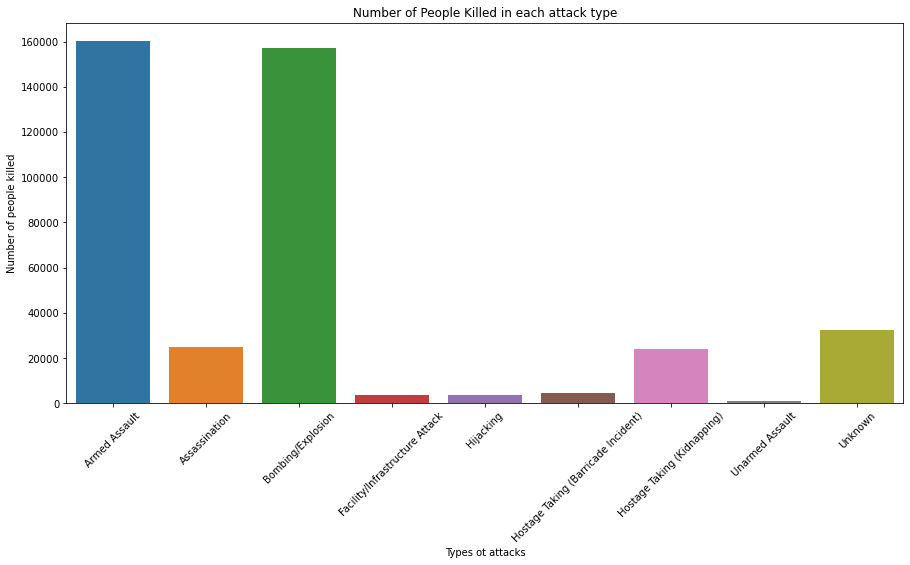

In [50]:
plt.subplots(figsize=(15,7))
sns.barplot(killed_.index,killed_ .Killed.values)
plt.title('Number of People Killed in each attack type')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 45)
plt.show()

In [ ]:
# OBSERVATION:-Maximum No of people killed by Armed Assault.

In [ ]:
                                               End

In [ ]:
                                             Thank YOu

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow
ERROR: No matching distribution found for tensorflow
